In [ ]:
pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

In [ ]:
import pandas as pd
from numpy import mean
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from pyearth import Earth
import matplotlib.pyplot as plt

import os
data = pd.read_csv("parkinsons_updrs.data.csv")

In [ ]:
data.drop(["motor_UPDRS"], axis=1, inplace=True)
data.drop(["subject#"], axis=1, inplace=True)
data

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
train, test = train_test_split(data, train_size=0.7, random_state=1)

In [ ]:
#create fake regression data
X, y = make_regression(n_samples=5875, n_features=22, n_informative=15,
                       noise=0.5, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

model = Earth(max_degree=2, penalty=1.0, minspan_alpha = 0.01, endspan_alpha = 0.01, endspan=5) #2nd degree formula is necessary to see interactions, penalty and alpha values for making model simple

model.fit(x_train, y_train)
model.score(x_train, y_train)

y_pred_mars_train = model.predict(x_train)
y_pred_mars_test = model.predict(x_test)

accuracy_mars_train = r2_score(y_train, y_pred_mars_train)
print("Training Accuracy for Multivariate Adaptive Regression Spline: ", accuracy_mars_train)

accuracy_mars_test = r2_score(y_test, y_pred_mars_test)
print("Testing Accuracy for Multivariate Adaptive Regression Spline: ", accuracy_mars_test)

RMSE_mars_train = sqrt(mean_squared_error(y_train, y_pred_mars_train))
print("RMSE for Training Data: ", RMSE_mars_train)

RMSE_mars_test = sqrt(mean_squared_error(y_test, y_pred_mars_test))
print("RMSE for Testing Data: ", RMSE_mars_test)

Training Accuracy for Multivariate Adaptive Regression Spline:  0.9994862693049849
Testing Accuracy for Multivariate Adaptive Regression Spline:  0.9994688443325377
RMSE for Training Data:  5.007127731202292
RMSE for Testing Data:  5.061140139941288


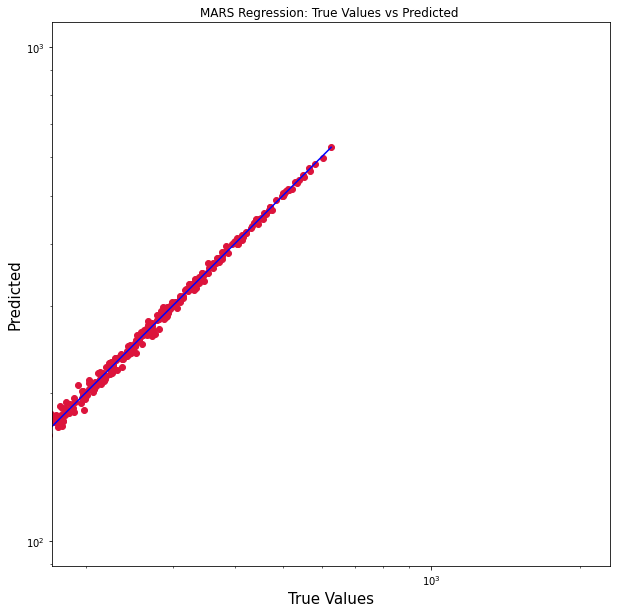

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_mars_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_mars_test), max(y_test))
p2 = min(min(y_pred_mars_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("MARS Regression: True Values vs Predicted ")
plt.axis('equal')
plt.show()